# Plus ou moins: comparaisons des solutions


 Nous allons voir ici quel méthode est la meilleure pour jouer au plus ou moins
    1. La méthode naïve qui consiste à faire des propositions de façon aléatoire
       entre des mins et max qu'on aura déterminer avec l'avancée du jeu
    2. La méthode dichotomique qui consist à faire des propositions en suivant 
        le principe de la dichotomie

In [1]:
#on recupere le jeu ainsi que les programmes qui vont y jouer
from game import *
import dichotomy, randoms

#pour pouvoir représenter graphiquement les victoires 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#on recupere les programmes qui joueront
programmes = [dichotomy.pmdichotomie, randoms.pmrandom]

#nombre de programme jouant
n = len(programmes)

#tables de victoires et pertes pour chaque programme
#les tables interieures sont respectivement les tables des victoires et perte des porgraammes:
    #pmdichotomie
    #pmrandom
#une victoire correspond à 1 et une perte à 0
report = []
for i in range(n):
    report.append([])

#pour recuperer le gagnant d'une partie
gagnant = 0



## Comportement des programmes

Nous allons voir deux types de comportements pour nos programmes que j'appelerai **standard** et **humain** respectivement.
Le **comportement standard** est un comportement où chaque programme fait ses propositions sans tenir compte de celle des autres alors que avec le **comportement humain** chaque programme fait sa proposition en tenant compte de celle des autres.
Nous allons effectuer plusieurs parties (100,  1000, 10000) et observer les résultats pour chaque comportement.

## 1. Standard
Dans ce mode, nos programmes jouent indépendamment l'un de l'autre, je pourrai considérer que c'est un système-pseudo isolé si j'étais en physique; cela pour dire que c'est comme si chaque programme jouer sa partie de son côté. Cette situation correspond donc à une partie en solo comme dans [le juste prix](https://fr.wikipedia.org/wiki/Le_Juste_Prix)

Sur 100 parties, le programmes dichotomie à gagner 52 fois avec un taux de: 52 %
Sur 100 parties, le programmes aleatoire à gagner 48 fois avec un taux de: 48 %


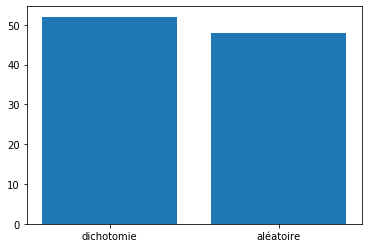

In [3]:
for i in range(100):
    gagnant = play_game(Reflexion.STANDARD, *programmes)
    for j in range(n):
        if j == gagnant:
            report[j].append(1)
        else:
            report[j].append(0)
total = sum(report[0])
print("Sur 100 parties, le programmes dichotomie à gagner", total,"fois", "avec un taux de:", total, "%")
total1 = sum(report[1])
print("Sur 100 parties, le programmes aleatoire à gagner", sum(report[1]),"fois", "avec un taux de:", total1, "%") 
plot = plt.bar([1,2],[total, total1], 
        tick_label=["dichotomie","aléatoire"])

#réinitialisation de la table pour d'autres tests
report = []
for i in range(n):
    report.append([])

Sur 1000 parties, le programmes dichotomie à gagner 474 fois avec un taux de: 47.4 %
Sur 1000 parties, le programmes aleatoire à gagner 526 fois avec un taux de: 52.6 %


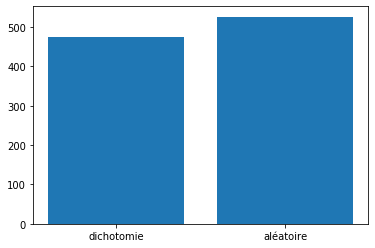

In [4]:
for i in range(1000):
    gagnant = play_game(Reflexion.STANDARD, *programmes)
    for j in range(n):
        if j == gagnant:
            report[j].append(1)
        else:
            report[j].append(0)

total = sum(report[0])
print("Sur 1000 parties, le programmes dichotomie à gagner", total,"fois", "avec un taux de:", total/10, "%")
total1 = sum(report[1])
print("Sur 1000 parties, le programmes aleatoire à gagner", sum(report[1]),"fois", "avec un taux de:", total1/10, "%") 

plot = plt.bar([1,2],[total, total1], 
        tick_label=["dichotomie","aléatoire"])

#réinitialisation de la table pour d'autres tests
report = []
for i in range(n):
    report.append([])

Sur 10000 parties, le programmes dichotomie à gagner 4725 fois avec un taux de: 47.25 %
Sur 10000 parties, le programmes aleatoire à gagner 5275 fois avec un taux de: 52.75 %


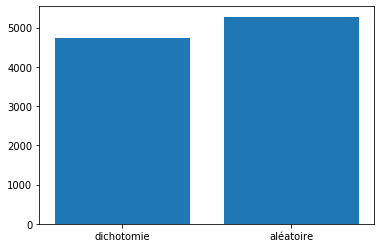

In [5]:
for i in range(10000):
    gagnant = play_game(Reflexion.STANDARD, *programmes)
    for j in range(n):
        if j == gagnant:
            report[j].append(1)
        else:
            report[j].append(0)

total = sum(report[0])
print("Sur 10000 parties, le programmes dichotomie à gagner", total,"fois", "avec un taux de:", total/100, "%")
total1 = sum(report[1])
print("Sur 10000 parties, le programmes aleatoire à gagner", sum(report[1]),"fois", "avec un taux de:", total1/100, "%")

plot = plt.bar([1,2],[total, total1], 
        tick_label=["dichotomie","aléatoire"])


#réinitialisation de la table pour d'autres tests
report = []
for i in range(n):
    report.append([])

Sur 100000 parties, le programmes dichotomie à gagner 47291 fois avec un taux de: 47.291 %
Sur 100000 parties, le programmes aleatoire à gagner 52709 fois avec un taux de: 52.709 %


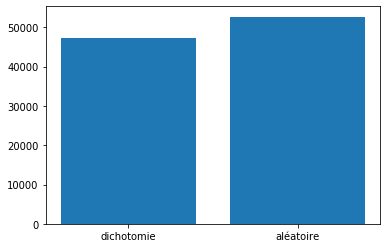

In [6]:
for i in range(100000):
    gagnant = play_game(Reflexion.STANDARD, *programmes)
    for j in range(n):
        if j == gagnant:
            report[j].append(1)
        else:
            report[j].append(0)

total = sum(report[0])
print("Sur 100000 parties, le programmes dichotomie à gagner", total,"fois", "avec un taux de:", total/1000, "%")
total1 = sum(report[1])
print("Sur 100000 parties, le programmes aleatoire à gagner", sum(report[1]),"fois", "avec un taux de:", total1/1000, "%") 

plot = plt.bar([1,2],[total, total1], 
        tick_label=["dichotomie","aléatoire"])

#réinitialisation de la table pour d'autres tests
report = []
for i in range(n):
    report.append([])

On constate qu'en dessous des 10000 parties qu'il arrive des cas où la méthode par dichotomie ait plus de victoire que celle aléatoire, mais la méthode aléatoire reste gagnante en générale. au dessus des 10000 parties la méSithode aléeatoire reste toujours gagnante.
Si vous comptez donc jouer très peu de parties de plus ou moins (à une émission télé par exemple) n'hésiter pas à opter pour la méthode dichotomie. Par compte si vous comptez faire énormement de parties (désolé, j'ai aucun exemple pour le moment), la méthode aléatoire est la meilleure pour vous.

## 2. Humain
Dans ce mode chaque programme joue en considérants les propositions des autres programmes, cela correspond à une parties à une plusieurs. Plusieurs candidats doivent trouver un même mot mystère tout en faisant des propositions chacun à son tour.
Ce serait bête de ne pas considérer le jeu de l'autre.

Sur 100 parties, le programmes dichotomie à gagner 70 fois avec un taux de: 70 %
Sur 100 parties, le programmes aleatoire à gagner 30 fois avec un taux de: 30 %


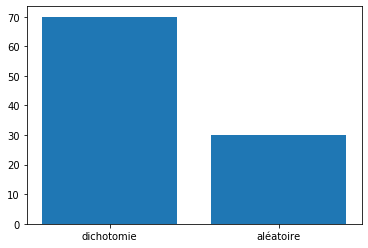

In [7]:
for i in range(100):
    gagnant = play_game(Reflexion.HUMAN, *programmes)
    for j in range(n):
        if j == gagnant:
            report[j].append(1)
        else:
            report[j].append(0)
total = sum(report[0])
print("Sur 100 parties, le programmes dichotomie à gagner", total,"fois", "avec un taux de:", total, "%")
total1 = sum(report[1])
print("Sur 100 parties, le programmes aleatoire à gagner", sum(report[1]),"fois", "avec un taux de:", total1, "%") 
plot = plt.bar([1,2],[total, total1], 
        tick_label=["dichotomie","aléatoire"])

#réinitialisation de la table pour d'autres tests
report = []
for i in range(n):
    report.append([])

Sur 1000 parties, le programmes dichotomie à gagner 677 fois avec un taux de: 67.7 %
Sur 1000 parties, le programmes aleatoire à gagner 323 fois avec un taux de: 32.3 %


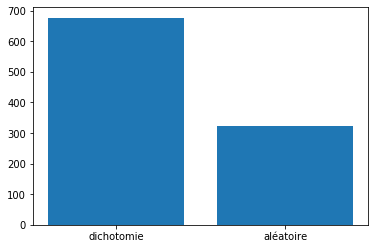

In [8]:
for i in range(1000):
    gagnant = play_game(Reflexion.HUMAN, *programmes)
    for j in range(n):
        if j == gagnant:
            report[j].append(1)
        else:
            report[j].append(0)

total = sum(report[0])
print("Sur 1000 parties, le programmes dichotomie à gagner", total,"fois", "avec un taux de:", total/10, "%")
total1 = sum(report[1])
print("Sur 1000 parties, le programmes aleatoire à gagner", sum(report[1]),"fois", "avec un taux de:", total1/10, "%") 

plot = plt.bar([1,2],[total, total1], 
        tick_label=["dichotomie","aléatoire"])

#réinitialisation de la table pour d'autres tests
report = []
for i in range(n):
    report.append([])

Sur 10000 parties, le programmes dichotomie à gagner 6671 fois avec un taux de: 66.71 %
Sur 10000 parties, le programmes aleatoire à gagner 3329 fois avec un taux de: 33.29 %


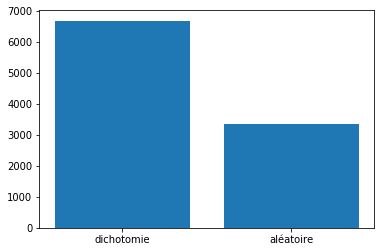

In [9]:
for i in range(10000):
    gagnant = play_game(Reflexion.HUMAN, *programmes)
    for j in range(n):
        if j == gagnant:
            report[j].append(1)
        else:
            report[j].append(0)

total = sum(report[0])
print("Sur 10000 parties, le programmes dichotomie à gagner", total,"fois", "avec un taux de:", total/100, "%")
total1 = sum(report[1])
print("Sur 10000 parties, le programmes aleatoire à gagner", sum(report[1]),"fois", "avec un taux de:", total1/100, "%")

plot = plt.bar([1,2],[total, total1], 
        tick_label=["dichotomie","aléatoire"])


#réinitialisation de la table pour d'autres tests
report = []
for i in range(n):
    report.append([])

Sur 100000 parties, le programmes dichotomie à gagner 66761 fois avec un taux de: 66.761 %
Sur 100000 parties, le programmes aleatoire à gagner 33239 fois avec un taux de: 33.239 %


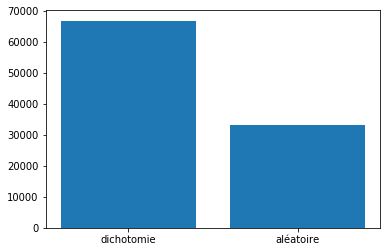

In [10]:
for i in range(100000):
    gagnant = play_game(Reflexion.HUMAN, *programmes)
    for j in range(n):
        if j == gagnant:
            report[j].append(1)
        else:
            report[j].append(0)

total = sum(report[0])
print("Sur 100000 parties, le programmes dichotomie à gagner", total,"fois", "avec un taux de:", total/1000, "%")
total1 = sum(report[1])
print("Sur 100000 parties, le programmes aleatoire à gagner", sum(report[1]),"fois", "avec un taux de:", total1/1000, "%") 

plot = plt.bar([1,2],[total, total1], 
        tick_label=["dichotomie","aléatoire"])

#réinitialisation de la table pour d'autres tests
report = []
for i in range(n):
    report.append([])

 On constate que cette fois la méthode de dichotomie écrase la méthode aléatoire sur près de  deux tiers des parties jouées; c'est à dire qu'on a deux victoires pour 3 parties quand on applique la dichotoie.
 Si vous faites donc une partie à plusieurs, la méthode dichotomie reste ton meilleur allié.

## Cnclusion